Medical Insurance Price Prediction using Machine Learning – Python

You must have heard some advertisements regarding medical insurance that promises to help financially in case of any medical emergency. One who purchases this type of insurance has to pay premiums monthly and this premium amount varies vastly depending upon various factors. 
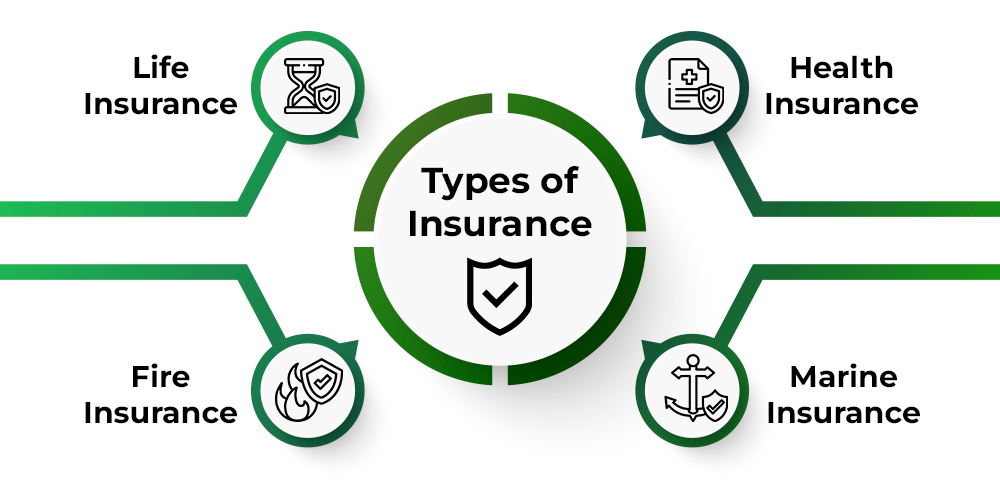

In this project, we will try to extract some insights from a dataset that contains details about the background of a person who is purchasing medical insurance along with what amount of premium is charged to those individuals as well using Machine Learning in Python.

# Importing Libraries and Dataset
Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.
- Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
- Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
- Matplotlib/Seaborn – This library is used to draw visualizations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Now let’s use the panda’s data frame to load the dataset and look at the first five rows of it.
dataframe1=pd.read_csv("insurance.csv")
print (dataframe1)


      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


- Now, we can observe the data and its shape(rows x columns)

- This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

In [3]:
print (dataframe1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
print(dataframe1.describe())


               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


In [5]:
# We can look at the descriptive statistical measures of the continuous data available in the dataset.


# Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

In [6]:
print(dataframe1.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


So, from the output above we can conclude that there are no null values in the dataset given.

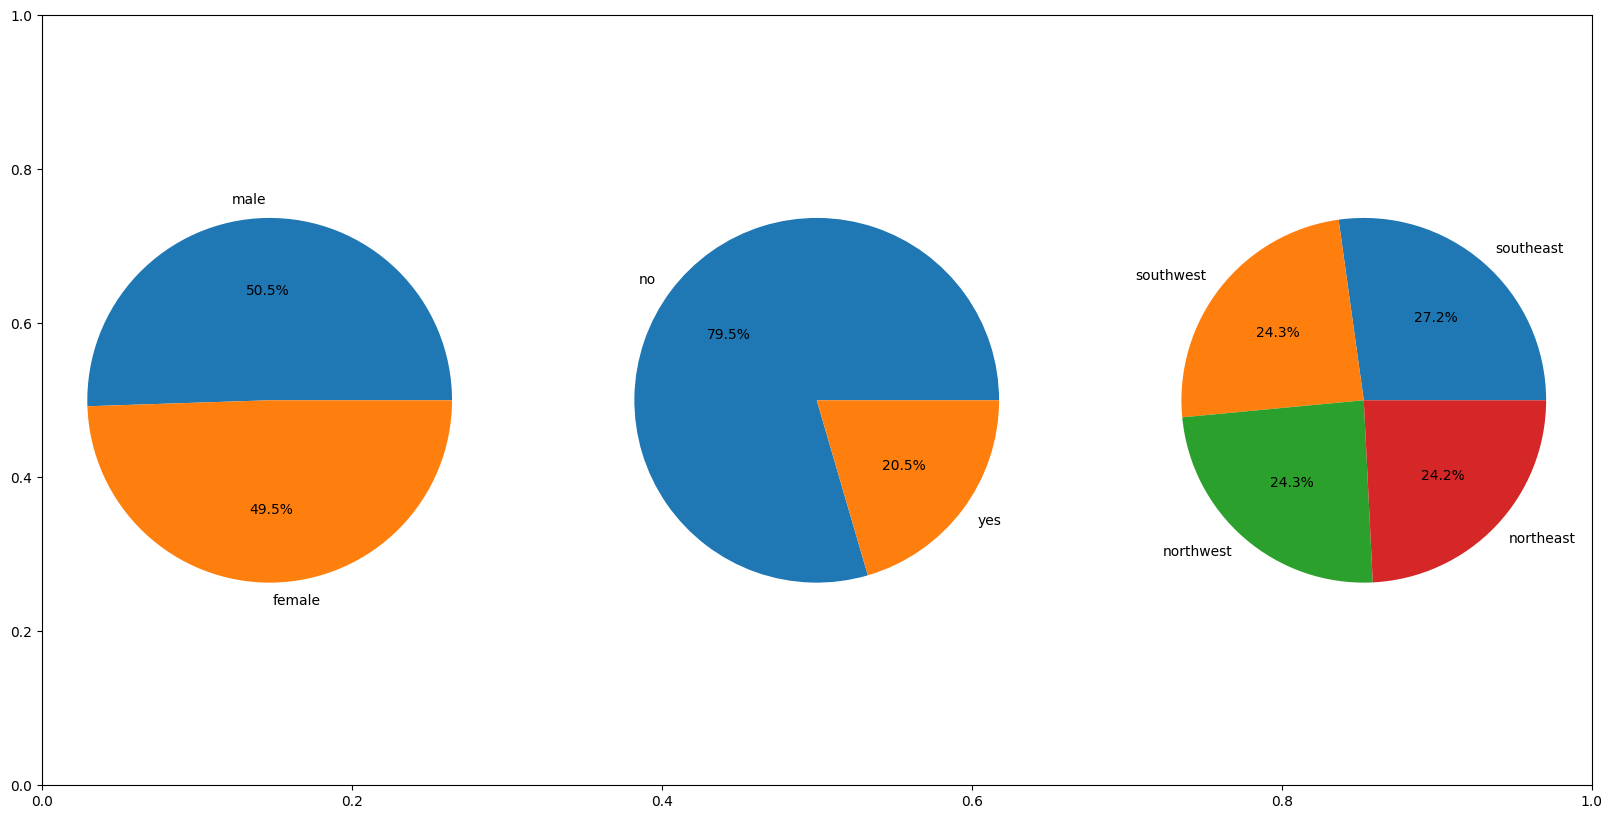

In [7]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = dataframe1[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

# plots the Pie chart for the sex, smoker, and region column


- From the output above, we can say that the data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

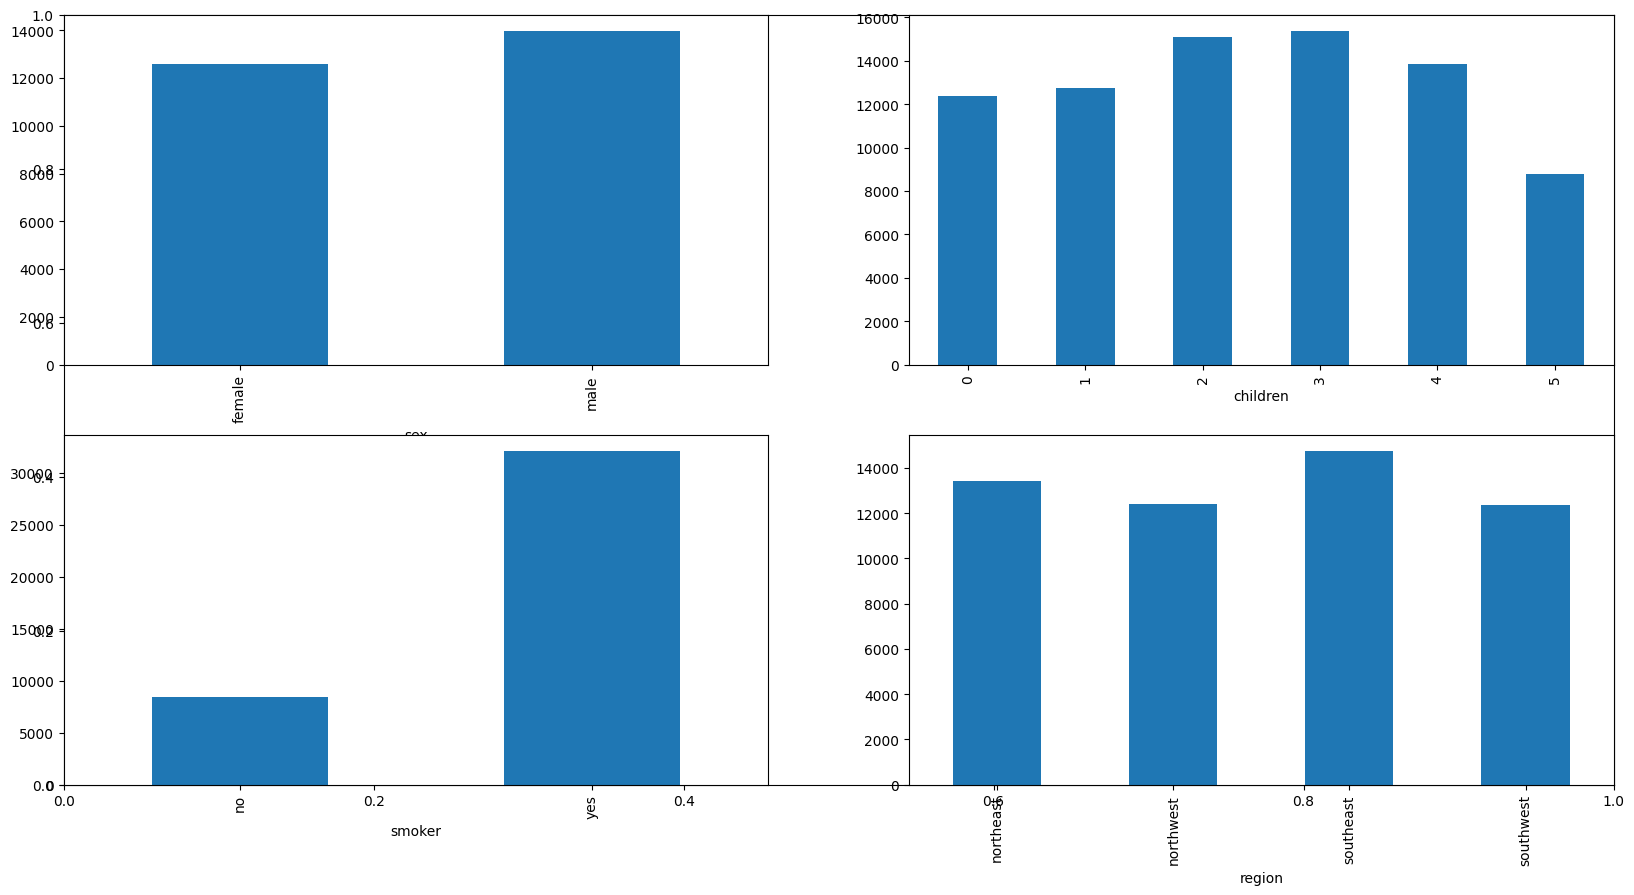

In [8]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    dataframe1.groupby(col)["expenses"].mean().plot.bar()
plt.show()

# prints Comparison between charges paid between different groups




Now let’s look at some of the observations which are shown in the above graphs:

- Charges are on the higher side for males as compared to females but the difference is not that much.
- Premium charged from the smoker is around thrice that which is charged from non-smokers.
- Charges are approximately the same in the given four regions.

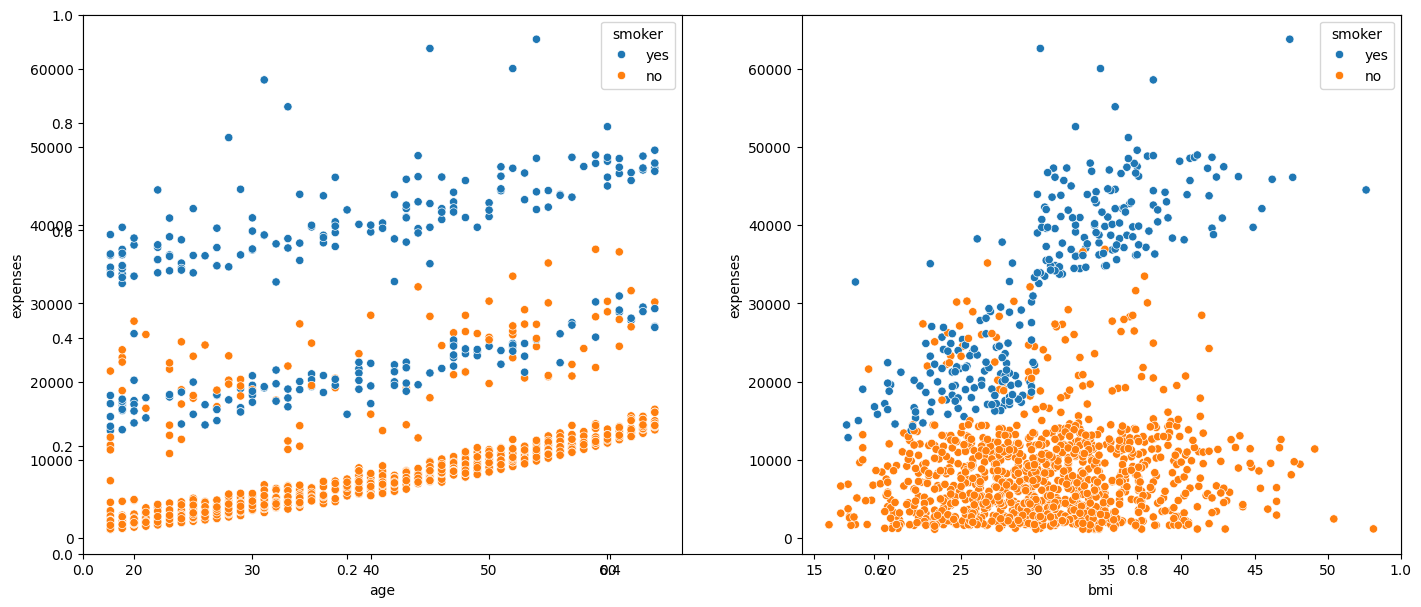

In [9]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=dataframe1, x=col,
				y='expenses',
				hue='smoker')
plt.show()


- A clear distinction can be observed above between the charges/expenses that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

# DATA PREPROCESSING

- Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

<Axes: ylabel='age'>

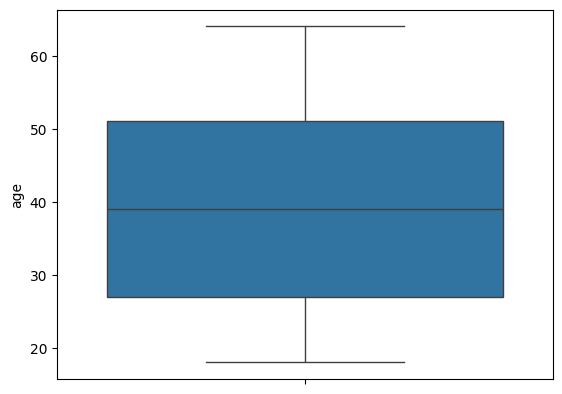

In [10]:
dataframe1.drop_duplicates(inplace=True)
sns.boxplot(dataframe1['age'])


- for this graph, we can see that there are no outliers present in age column

<Axes: ylabel='bmi'>

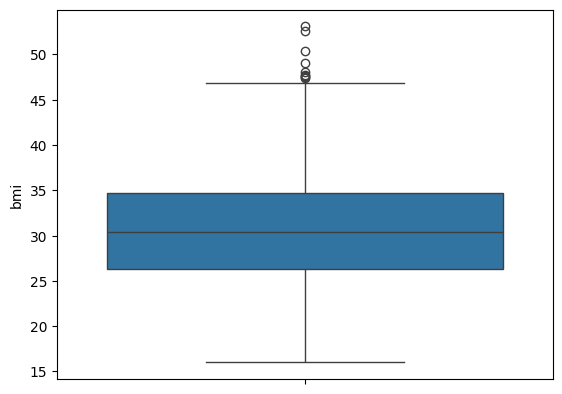

In [11]:
sns.boxplot(dataframe1['bmi'])


- For this bmi graph: 
Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [12]:
Q1=dataframe1['bmi'].quantile(0.25)
Q2=dataframe1['bmi'].quantile(0.5)
Q3=dataframe1['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.699999999999998
47.300000000000004


<Axes: ylabel='bmi'>

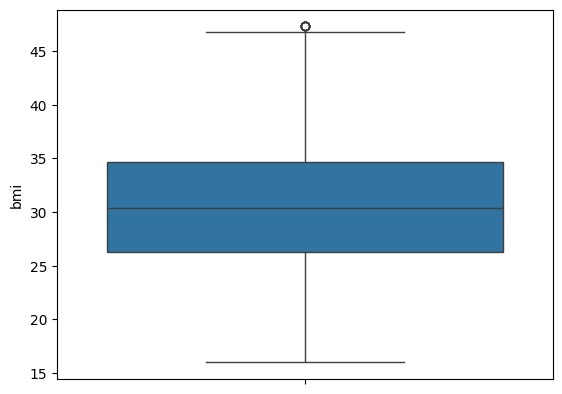

In [13]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
dataframe1[['bmi']]=arb.fit_transform(dataframe1[['bmi']])
sns.boxplot(dataframe1['bmi'])


In [14]:
%pip install feature_engine


Note: you may need to restart the kernel to use updated packages.


<Axes: ylabel='bmi'>

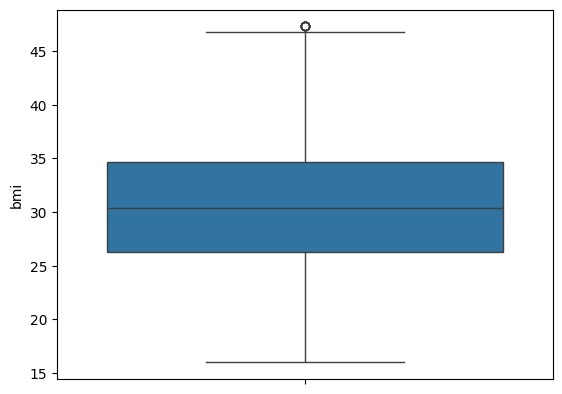

In [15]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
dataframe1[['bmi']]=arb.fit_transform(dataframe1[['bmi']])
sns.boxplot(dataframe1['bmi'])


- By doing this, now we successfully treated the outliers .

# Data Wrangling

- Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.


In [16]:
print (dataframe1['bmi'].skew())


0.2334283076914668


In [17]:
print(dataframe1['age'].skew())


0.054780773126998195


- From the skew, we conclude that data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

# Encoding

- encoding is to be done for discrete categorical data (sex,bmi,region).

In [18]:
dataframe1['sex']=dataframe1['sex'].map({'male':0,'female':1})
dataframe1['smoker']=dataframe1['smoker'].map({'yes':1,'no':0})
dataframe1['region']=dataframe1['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
print (dataframe1)


      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       3  16884.92
1      18    0  33.8         1       0       2   1725.55
2      28    0  33.0         3       0       2   4449.46
3      33    0  22.7         0       0       0  21984.47
4      32    0  28.9         0       0       0   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       0  10600.55
1334   18    1  31.9         0       0       1   2205.98
1335   18    1  36.9         0       0       2   1629.83
1336   21    1  25.8         0       0       3   2007.95
1337   61    1  29.1         0       1       0  29141.36

[1337 rows x 7 columns]


Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for <b>Model Development</b>.

In [19]:
dataframe1.corr()


,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.112069,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044843,-0.017848,-0.076596,-0.008998,-0.058045
bmi,0.112069,-0.044843,1.000000,0.013574,0.003369,0.156839,0.199298
children,0.041536,-0.017848,0.013574,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003369,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156839,-0.002842,0.012736,1.000000,0.010767
expenses,0.298308,-0.058045,0.199298,0.067389,0.787234,0.010767,1.000000


# Model Development
- There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. 
- So, to make this decision we split our data into training and validation data. 
- Then we use the validation data to choose the model with the highest performance.

In [20]:
X=dataframe1.drop(['expenses'],axis=1)
Y=dataframe1[['expenses']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
    dataframe11=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
    print (dataframe11)



   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
3   0.754273  0.732813  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
3   0.754273  0.732813  0.747086
4   0.742987  0.779584  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
3   0.754273  0.732813  0.747086
4   0.742987  0.779584  0.747086
5   0.753298  0.731771  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.7295

In [21]:
X=dataframe1.drop(['expenses'],axis=1)
Y=dataframe1[['expenses']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
    dataframe11=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
    print (dataframe11)
# thia will print Scores for various random_state number


   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
3   0.754273  0.732813  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
3   0.754273  0.732813  0.747086
4   0.742987  0.779584  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.729567  0.806226  0.747086
3   0.754273  0.732813  0.747086
4   0.742987  0.779584  0.747086
5   0.753298  0.731771  0.747086
   train acc  test acc       cvs
0   0.741684  0.778388  0.747086
1   0.756416  0.706279  0.747086
2   0.7295

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())


0.7295673146243207
0.8062261856473879
0.7470863719348163


In [23]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())


-0.10151556923589111
-0.1344463689752997
-0.10374609837645332


# RandomForestRegressor

In [24]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("\n RandomForestRegressor:")
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print("Hyperparametertuning:")
print(grid.best_params_)

rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())



 RandomForestRegressor:
0.9738601477948087
0.8816654160106289
0.8365626286089844
Hyperparametertuning:
{'n_estimators': 120}
0.9746923328436323
0.8819750300066196
0.8371959273826677


# GradientBoostingRegressor()

In [25]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("\n Gradient Boosting Regressor:")
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print("\n  Hyper parameter tuning:")
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())



 Gradient Boosting Regressor:
0.8903912282468484
0.8996036246308442
0.8553257687053266

  Hyper parameter tuning:
{'learning_rate': 0.2, 'n_estimators': 20}
0.8668967296432014
0.901260150507639
0.860778961577009


# XGBRegressor

In [26]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("\n  XGBRegressor:")
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print("\n  Hyper-parameter tuning:")
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())



  XGBRegressor:
0.9953575134277344
0.8656051754951477
0.8087373733520508

  Hyper-parameter tuning:
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8699851632118225
0.9016817212104797
0.8600637793540955


In [27]:
import pandas as pd

# Creating the data
data = {
    "Model": ["LinearRegression", "SupportVectorMachine", "RandomForest", "GradientBoost", "XGBoost"],
    "Train Accuracy": [0.729, -0.105, 0.974, 0.868, 0.870],
    "Test Accuracy": [0.806, -0.134, 0.882, 0.901, 0.904],
    "CV Score": [0.747, 0.103, 0.836, 0.860, 0.860]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Setting the index to 'Model' for better display
df.set_index('Model', inplace=True)

# Printing the DataFrame to the console
print(df)

# Converting the DataFrame to an HTML table
html_table = df.to_html()

# Saving the HTML table to a file
with open("table.html", "w") as file:
    file.write(html_table)


                      Train Accuracy  Test Accuracy  CV Score
Model                                                        
LinearRegression               0.729          0.806     0.747
SupportVectorMachine          -0.105         -0.134     0.103
RandomForest                   0.974          0.882     0.836
GradientBoost                  0.868          0.901     0.860
XGBoost                        0.870          0.904     0.860


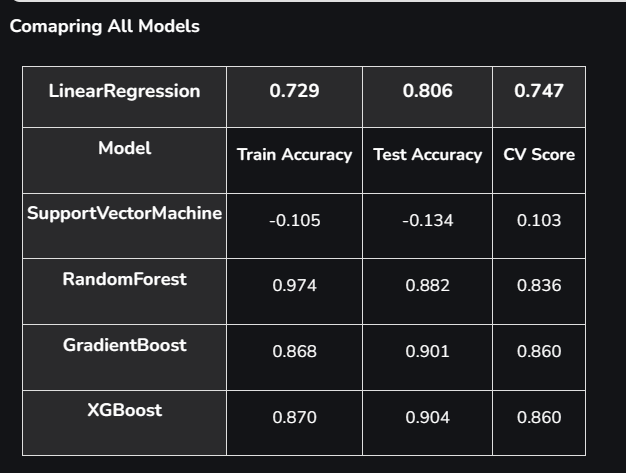

* From the above table we can observe that XGBoost is the best model.
* Now we need to identify the important features for predicting of charges.


In [32]:
FeaturesImp=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
print(FeaturesImp) # this will print the Features Importance


          Importance
age         0.039921
sex         0.000000
bmi         0.126126
children    0.012205
smoker      0.817423
region      0.004324


In [34]:
important_features=FeaturesImp[FeaturesImp['Importance']>0.01]
print(important_features) # This prints the important Features, should hv a score of above 0.01


          Importance
age         0.039921
bmi         0.126126
children    0.012205
smoker      0.817423


# Final Model:

In [35]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


KeyError: "None of [Index(['sex', 'region'], dtype='object')] are in the [columns]"

In [41]:
# To correct the error above, let's check the columns available
print(dataframe1.columns)


Index(['age', 'bmi', 'children', 'smoker', 'expenses'], dtype='object')


In [52]:
"""dataframe1.drop(dataframe1[['sex','region']],axis=1,inplace=True)"""# had dropped this in first run
Xf=dataframe1.drop(dataframe1[['expenses']],axis=1)
X=dataframe1.drop(dataframe1[['expenses']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)

print("Final Model:")
print("Train Accuracy:", r2_score(ytrain,ypredtrain4))
print("Test Accuracy:", r2_score(ytest,ypredtest4))
print("CV Score   :", cross_val_score(finalmodel,X,Y,cv=5,).mean())


Final Model:
Train Accuracy: 0.8685410618782043
Test Accuracy: 0.9013273119926453
CV Score   : 0.860429310798645


# Save Model:

In [53]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))


# Predict on new data:

In [54]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([18295.182], dtype=float32)

# Conclusion:
- Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

- The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.